<a href="https://colab.research.google.com/github/yenlung/Math-in-Jupyter/blob/main/colab%E5%BE%AE%E7%A9%8D%E5%88%8606_%E6%B3%B0%E5%8B%92%E7%B4%9A%E6%95%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

## 1. `sympy` 基本設定

就是讀入 `symify` 的縮寫版 `S`, 還有定義 `x` 為符號變數。

In [2]:
from sympy import S

In [3]:
from sympy.abc import x

## 2. 找到第 $n$ 項的泰勒級數

In [4]:
f = sp.sin(x)

T = sp.series(f, n=11)

第 $n$ 項我們可以令一個變數, 更容易調整。Py人很喜歡把變數名和參數名設一樣!

In [5]:
n = 11
T = sp.series(f, n=n)

In [6]:
T

x - x**3/6 + x**5/120 - x**7/5040 + x**9/362880 + O(x**11)

有個討厭的 big O, 要怎麼去掉呢?

In [7]:
Tn = T.removeO()

In [8]:
Tn

x**9/362880 - x**7/5040 + x**5/120 - x**3/6 + x

於是我們真的可以算 $\sin$ 值...

In [9]:
Tn.subs(x,1.0)

0.841471009700176

## 3. 誤差是多少呢?

$$|R_n(x)| \leq \left|\dfrac{M}{(n+1)!} x^{n+1}\right|$$

因為是 $\sin(x)$ 的 $n+1$ 階導數, 所以 $|f^{n+1}(x)| \leq 1$, 也就是我們可以取 $M=1$。

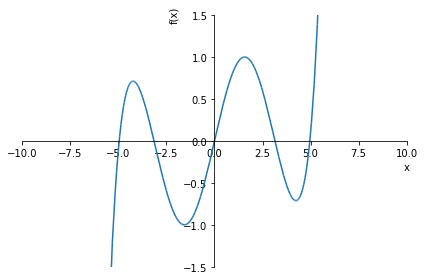

In [10]:
sp.plot(Tn, xlim=(-10,10), ylim=(-1.5, 1.5))

In [11]:
Rn = 1/(sp.factorial(n))*1**n

In [13]:
Rn.n(5)

2.5052e-8

In [14]:
T = sp.series(f, n=8).removeO()

In [15]:
T

-x**7/5040 + x**5/120 - x**3/6 + x

In [16]:
T.subs(x,1.0)

0.841468253968254

所以看起來還可以!

## 4. 欣賞慢慢逼近的感覺!

In [17]:
from ipywidgets import interact

In [18]:
def my_sin(n):
    f = sp.sin(x)
    Tn = sp.series(f, n=n).removeO()
    graph = sp.plot(f, Tn,  xlim=(-10,10), ylim=(-1.5, 1.5), show=False)
    graph[0].line_color='b'
    graph[1].line_color='r'
    graph.show()

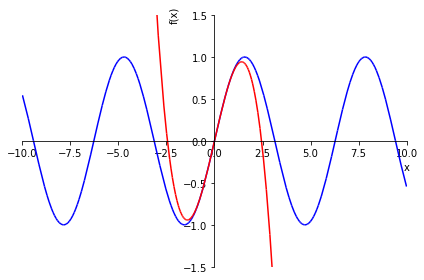

In [19]:
my_sin(5)

In [20]:
interact(my_sin, n=(1, 20));

interactive(children=(IntSlider(value=10, description='n', max=20, min=1), Output()), _dom_classes=('widget-in…

## 【作業】

用泰勒多項式計算 $e$ 的值, 誤差要在 0.000001 之內。記得「不可以」假設我們會算 $e^n$ 這種數, 除非是 $e^0$。

你也可以仿前面介紹的方法, 畫個 $T_n(x)$ 慢慢逼近 $f(x)=e^x$的圖。